In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
filename = "../../external_projects/data_raw_bva/supreme_court_opinions/20220419_lexis_opinions_filtered_op_length_mini.csv"

# read csv into dataframe
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,case_type,dc_identifier,opinion_type,opinion_id,opinion,opinion_tokenized,word_count,token_frequencies,citations_types,...,share_punct,share_sconj,share_sym,share_verb,share_x,share_eol,share_space,word_entropy,text_immigration,text_criminal
0,0,supreme,3S4X-FHP0-003B-H426-00000-00,majority,1613658,MR. JUSTICE BROWN delivered the opinion of the...,"{mr,justic,brown,deliv,opinion,court,case,turn...",1634,"{""1"": 1, ""6"": 1, ""b"": 1, ""v"": 2, ""11"": 1, ""14""...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f
1,1,supreme,3S4X-G070-003B-S065-00000-00,concurring,1642258,"MR. JUSTICE DOUGLAS, concurring.\n\nWhile I jo...","{mr,justic,dougla,concur,join,opinion,court,re...",205,"{""v"": 1, ""mr"": 5, ""385"": 1, ""440"": 1, ""447"": 1...",{case},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f
2,2,supreme,3VYS-J980-004B-Y00W-00000-00,majority,13640084,ON MOTIONS FOR LEAVE TO PROCEED IN FORMA PAUPE...,"{motion,leav,proceed,forma,pauperi,per,curiam,...",384,"{""1"": 1, ""l"": 4, ""n"": 1, ""v"": 5, ""14"": 1, ""29""...","{courtRule,courtRule,courtRule,courtRule,court...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f
3,3,supreme,3S4X-9950-003B-S0CX-00000-00,majority,8199066,Motion of the State of California to participa...,"{motion,state,california,particip,oral,argumen...",104,"{""15"": 3, ""inc"": 1, ""also"": 1, ""deni"": 2, ""edu...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f
4,4,supreme,3S4X-FBH0-003B-S2HD-00000-00,dissenting,65968,"MR. JUSTICE HARLAN, concurring in part and dis...","{mr,justic,harlan,concur,part,dissent,part,cou...",4902,"{""1"": 5, ""2"": 4, ""3"": 3, ""4"": 25, ""5"": 48, ""6""...","{statute,case,constitution,constitution,consti...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f


In [2]:
# convert citations from string to list of strings
df['citations_raw'] = df['citations_raw'].apply(lambda d: d[2:-2].split(",") if isinstance(d, str) else [])
df['num_citations'] = df['citations_raw'].apply(lambda x: len(x))


## dataset statistics

hello


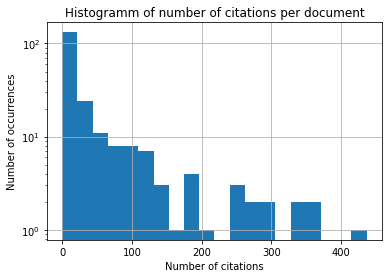

In [4]:
# plot histogramm
df['num_citations'].hist(bins=20)
plt.title('Histogramm of number of citations per document')
# log yscale
plt.yscale('log')
plt.ylabel('Number of occurrences')
plt.xlabel('Number of citations')
plt.show()

In [5]:
# get mean
print(df['num_citations'].mean())
# got total number of citations:
print(df['num_citations'].sum())
# num documents
print(len(df))

56.10530303030303
2369888
42240


### filtered vs unfiltered
the BVA authors removed citations with less than 20 occurances
in the data available to us the number of documents was reduced from 324000 to 42240

this changes the avg num of citations per document from 56.1 to 21.6

the total number of citations changes from 2369888 to 7000038



In [6]:
# find row with the most citations
doc = df.iloc[df['num_citations'].idxmax()]
# yes it actually contains >3000 citations
print(doc['opinion'][:300])



Justice Stevens, with whom Justice Ginsburg, Justice Breyer, and Justice Sotomayor join, concurring in part and dissenting in part. 

The real issue in this case concerns how, not if, the appellant may finance its electioneering.  Citizens United is a wealthy nonprofit corporation that runs a politi


In [8]:
from collections import Counter
# count duplicates in df['longest_citations']
all_citations = df['citations_raw'].to_list()
# flatten all_citations
def flatten(t):
    return [item for sublist in t for item in sublist]

flattened = flatten(all_citations)
# remove trailing spaces
flattened = [x.replace(".","").lower().strip().replace('"',"").replace("'", "") for x in flattened]
counted = Counter(flattened)

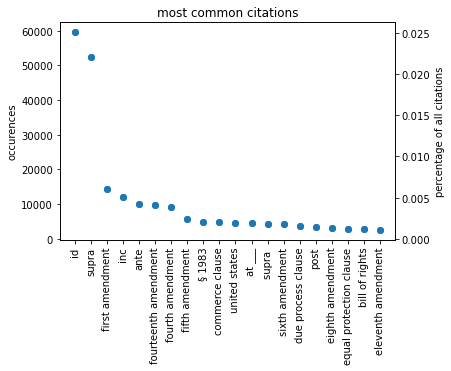

In [11]:
# select the 13 most common items
most_common = counted.most_common(20)
# convert list of tuples to two lists
most_common_citations, most_common_counts = zip(*most_common)
# normalize most_common_counts by total number of citations
# make the x axis labels diagonal
plt.xticks(rotation=90)

plt.scatter(most_common_citations, most_common_counts)
# show second y axis
plt.ylabel("occurences")

# show second y axis for normalized values
plt.twinx()
most_common_counts_normalized = [(i/len(flattened)) for i in most_common_counts]
plt.scatter(most_common_citations, most_common_counts_normalized)
plt.ylabel("percentage of all citations")

plt.title('most common citations')
plt.show()

In [10]:
most_common_citations

('id',
 'supra',
 'first amendment',
 'inc',
 'ante',
 'fourteenth amendment',
 'fourth amendment',
 'fifth amendment',
 '§ 1983',
 'commerce clause',
 'united states',
 'at ___',
 'supra ',
 'sixth amendment',
 'due process clause',
 'post',
 'eighth amendment',
 'equal protection clause',
 'bill of rights',
 'eleventh amendment')

In [16]:
# show some least common occurances
least_common = counted.most_common()[-10:]
print("citation, occurences")
for el in least_common:
    print(el)

citation, occurences
('5 u s c 3131', 1)
('31 u s c 1322', 1)
('16 u s c 1432', 1)
('312  (1936)', 1)
('spraigue   v  thompson', 1)
('95  (1886)', 1)
('484-485  (1922)', 1)
('frost  v  corporation commn of oklahoma', 1)
('525  (1929)', 1)
('174  (1870)', 1)
